In [1]:
import os
import sys
spark_path = "E:/spark"
os.environ['SPARK_HOME'] = spark_path
os.environ['HADOOP_HOME'] = spark_path
os.environ['PYSPARK_PYTHON'] = sys.executable
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")
from pyspark import SparkContext
from pyspark import SparkConf
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)

In [29]:
xyz = sc.textFile("file:///E:/BIG DATA/ANOTHERUFO/clean.csv")

In [30]:
xyz.first()

u'latitude,longitude'

In [31]:
xyz = xyz.filter(lambda x:"longitude" not in x)

In [32]:
xyz.first()

u'29.8830556,-97.9411111'

In [33]:
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel

In [34]:
parsedXYZ = xyz.map(lambda line: array([x for x in line.split(',')]))

In [35]:
parsedXYZ.take(5)

[array([u'29.8830556', u'-97.9411111'], 
       dtype='<U11'), array([u'29.38421', u'-98.581082'], 
       dtype='<U10'), array([u'53.2', u'-2.916667'], 
       dtype='<U9'), array([u'28.9783333', u'-96.6458333'], 
       dtype='<U11'), array([u'21.4180556', u'-157.8036111'], 
       dtype='<U12')]

In [36]:
xyz_only = parsedXYZ.map(lambda x: array([float(x[0]),float(x[1])]))

In [37]:
xyz_only.take(3)

[array([ 29.8830556, -97.9411111]),
 array([ 29.38421 , -98.581082]),
 array([ 53.2     ,  -2.916667])]

In [38]:
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

In [39]:
for l in range(1,6):
    clusters = KMeans.train(xyz_only, l, maxIterations=100, initializationMode="random")
    WSSSE = xyz_only.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("With " + str(l) + " clusters: Within Set Sum of Squared Error = " + str(WSSSE))

With 1 clusters: Within Set Sum of Squared Error = 13421961.9486
With 2 clusters: Within Set Sum of Squared Error = 13200517.0714
With 3 clusters: Within Set Sum of Squared Error = 1934483.6783
With 4 clusters: Within Set Sum of Squared Error = 1234806.83084
With 5 clusters: Within Set Sum of Squared Error = 1107940.17826


In [40]:
import matplotlib.pyplot as plt

In [41]:
plt

<module 'matplotlib.pyplot' from 'C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

In [43]:
clusters.save(sc, "KMeansKaniaKania")
sameModel = KMeansModel.load(sc, "KMeansKaniaKania")

In [44]:
sameModel

In [17]:
plt.figure(figsize=(14,7))
 

In [45]:
import numpy as np

In [46]:
np

<module 'numpy' from 'C:\ProgramData\Anaconda2\lib\site-packages\numpy\__init__.pyc'>

In [47]:
colormap = np.array(['red', 'lime', 'black'])

In [48]:
colormap

array(['red', 'lime', 'black'], 
      dtype='|S5')

In [50]:
sameModel.centers

[DenseVector([38.0232, -78.2707]),
 DenseVector([39240.2901, 32.7667]),
 DenseVector([39.8991, -119.4562]),
 DenseVector([37.6245, -94.0562]),
 DenseVector([32.425, 36.7152])]

In [51]:
x = xyz_only.map(lambda row: row[0]).collect()

In [52]:
y = xyz_only.map(lambda row: row[1]).collect()

In [53]:
plt.scatter(x, y)

In [54]:
plt.scatter([x[0] for x in sameModel.centers], [x[1] for x in sameModel.centers], s=90, c="red")

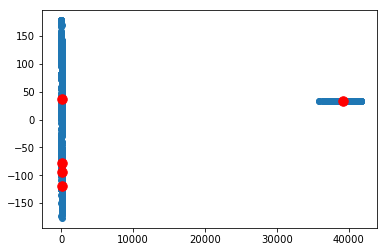

In [55]:
plt.show()